<header><font size="+2"> <center> <b> Solving the Ising model with the Metropolis Algorithm </b></center></font></header>

In [1]:
import numpy as np
import multiprocessing as mp
import itertools as it

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)

In [3]:
Tc = 2.269185


(I know these could be expressed as matrix ops, so far they're fast enough, though)

In [4]:
def p(ind, N):
    if ind == -1:
        return N - 1
    return ind % N

In [5]:
def energy(s, J=1):
    E = 0
    N = s.shape[0]

    for i in range(N):
        for j in range(N):
            dE = s[i, j] * (
                s[p(i+1, N), j] + s[p(i-1, N), j] 
                + s[i, p(j+1, N)] + s[i, p(j-1,N)]
            )
            E -= 0.5 * J * dE

    return E


# Use burn - in

In [6]:
def MCstep(s, N, E, T, J, nsteps):
    for itr in range(nsteps):
        indx = np.random.randint(0, N)
        indy = np.random.randint(0, N)

        dE = 2 * J * s[indy, indx] *  (  s[p(indy + 1, N), indx]\
                                       + s[p(indy - 1, N), indx]\
                                       + s[indy, p(indx - 1, N)]
                                       + s[indy, p(indx + 1, N)])

        # accept
        if (dE < 0) or np.random.rand() <= np.exp(-1 * (dE / T)):
            
            s[indy, indx] = s[indy, indx] * -1
            E = E + dE

    return s, E

def simulateBI(N, T, J = 1, burn_in = 3000, nsteps = 1000, n_outputs = 1000):
    ss = []
    Es = []
    Ms = []
    Mavgs = []
    
    # random init
    s = 2 * (np.random.uniform(size=(N, N)) > 0.5) - 1
    E = energy(s, J)

    # burn-in
    s, E = MCstep(s=s, N=N, E=E, T=T, J=J, nsteps = burn_in)
    
    #explore equlibrium state    
    for itr in range(n_outputs):     
        
        s = np.copy(s)
        ss.append(s)
        
        Es.append(E)
        Ms.append(np.sum(s))
        Mavgs.append(np.mean(s))
        
        s, E = MCstep(s=s, N=N, E=E, T=T, J=J, nsteps = nsteps)
    
    return ss, Es, Ms, Mavgs 

In [25]:
ss, Es, Ms, Mavgs = simulateBI(64, T=Tc, J=1, burn_in = 15000, nsteps = 1000, n_outputs=2000)

In [15]:
np.array(ss).tofile("mcdata/new_64_" + str(1) + ".dat")

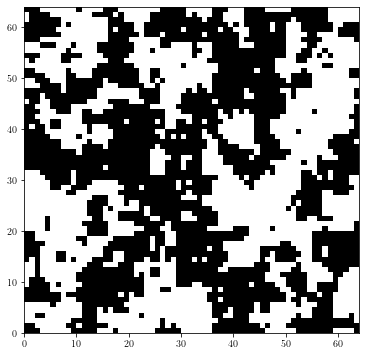

In [22]:
plt.pcolormesh(ss[100], cmap="binary");

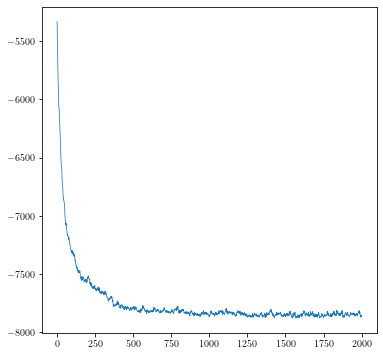

In [10]:
plt.plot(Es)

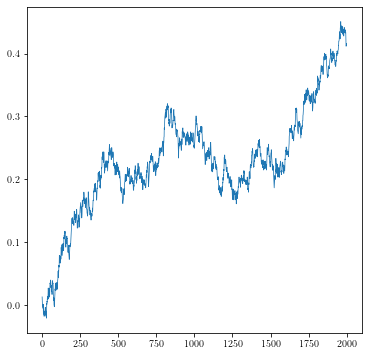

In [24]:
plt.plot(Mavgs);

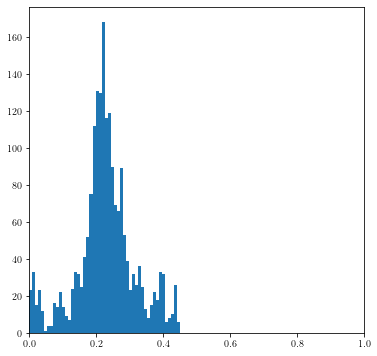

In [23]:
plt.hist(np.abs(Mavgs), bins=50);
plt.xlim(0, 1);